In [62]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
df = pd.read_pickle('/home/jim/rlease_results/trajectory_builder/testtrajbuilder_0.pickle')

In [64]:
df_2 = pd.DataFrame(df)


In [65]:
df_2.tail()

,episode,timestep,reward,vf,notes
1772,10,179,0.0,0.208847,ray_action
1773,10,180,0.0,0.169148,ray_action
1774,10,181,0.0,0.394671,ray_action
1775,10,182,0.0,0.119005,ray_action
1776,10,183,0.0,0.198681,ray_action


In [66]:
df_2.head()

,episode,timestep,reward,vf,notes
0,1,1,0.0,0.032130,ray_action
1,1,2,0.0,0.077974,ray_action
2,1,3,0.0,0.086582,ray_action
3,1,4,0.0,0.021133,ray_action
4,1,5,0.0,-0.154574,ray_action


In [67]:
# reading results
# DONE load in the file
# DONE plot reward
# DONE plot value function
    # thinking seaborn, two lines of bar charts (maybe smoothed?)
    # 	top is reward
    # 	bottom is value function
    # maybe just bar plots or reward points as large things when not equal to 0
    # maybe just two line plots for now

# LATER I probably want file size to be smaller but idk
# 	maybe downcast to lower floats and ints

# want VF stats vs. actual as well
# want VF stats overtime as well
# see what is in tensorboard, see what andy jones says, see what else is out there

# what is in tensorboard
    # VF explained variance
    # VF loss
    # find out what these mean, how to diagnose, how to use
    # i'm assuming VF loss is the loss as it is trained
    # I'm not sure what explained variance is look at ray docs

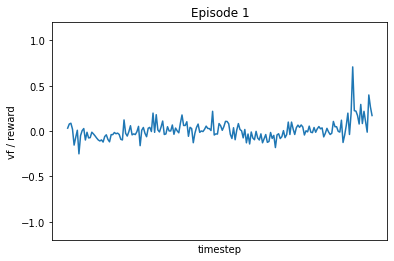

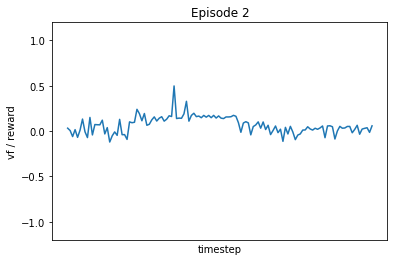

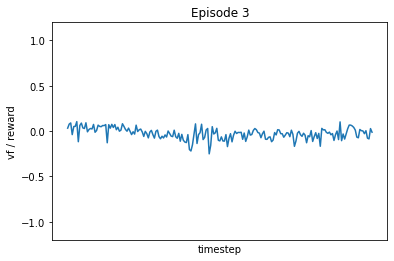

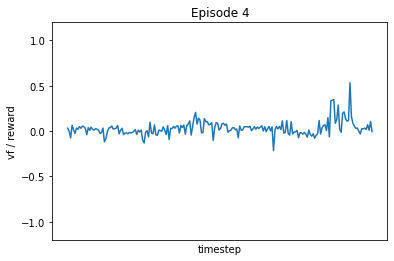

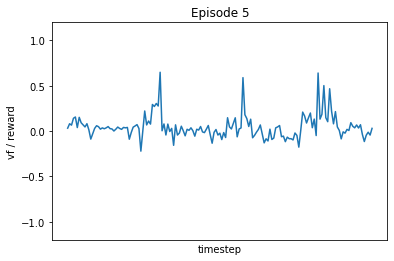

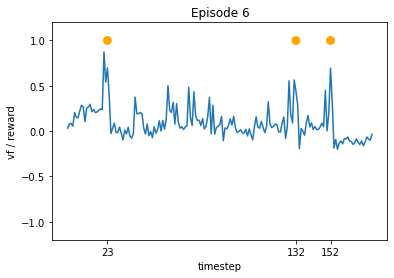

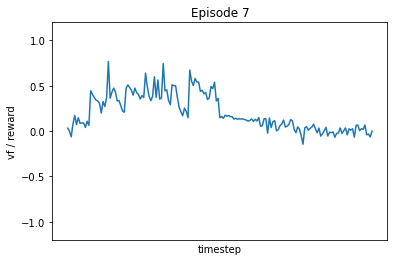

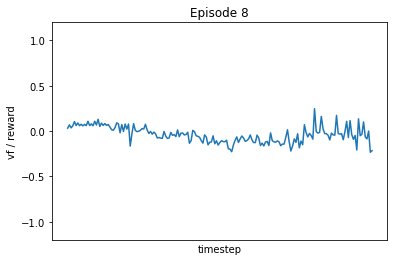

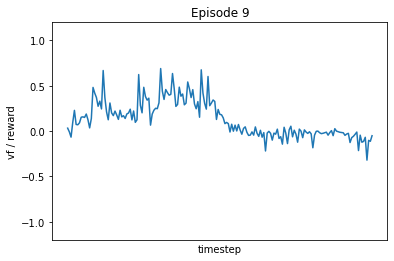

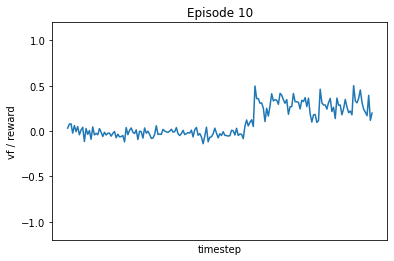

In [75]:
# Plot reward vs. VF
def plot_reward_vs_vf(df_in, is_filter_zero_reward=False, vf_col='vf', reward_col='reward', y_min=-1.2, y_max=1.2):
    df_in = df_in[["episode", "timestep", vf_col, reward_col]]
    episodes = df_in['episode'].drop_duplicates()
    for e in episodes:
        df = df_in[df_in['episode'] == e].copy()
        df.timestep = df.timestep - df.timestep.min()
        fig, ax = plt.subplots()
        ax.set(ylim=(y_min, y_max), xlabel='timestep', title="Episode {}".format(e))

        if is_filter_zero_reward:
            # remove any rewards are zero for plotting
            df_r = df.copy()
            df_r.loc[df_r[reward_col] == 0, 'reward'] = np.NaN
            xtick_index = df[df[reward_col] != 0].timestep
        else:
            df_r = df
            ax.set_xticks([])
            xtick_index = np.arange(0, df.timestep.max(), 50)

        if df_r.shape[0] > 0:
            sns.pointplot(y=reward_col, x=df_r.timestep, data=df_r, ax=ax, color='orange')
            #ax.set_xticks([df_r.index])

        sns.lineplot(y=vf_col, x=df.timestep, data=df, ax=ax) 
        ax.set_xticks(xtick_index)
        ax.set_ylabel('{} / {}'.format(vf_col, reward_col))
    
    # ax.set_xticks([]) based on the line plot or based on the rewards
    
# plot_reward_vs_vf(df_2)
plot_reward_vs_vf(df_2, is_filter_zero_reward=True)

In [ ]:
df_2